In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Наложение и удаление шума

In [2]:
image = cv2.imread('sar_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

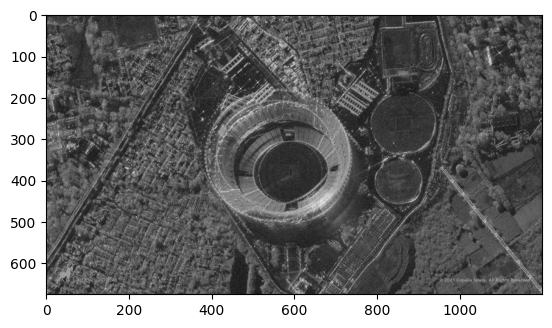

In [3]:
plt.imshow(image_gray, cmap="gray")

In [4]:
# Gaussian noise
mean = 0
stddev = 100
noise_gauss = np.zeros(image_gray.shape, np.uint8)
cv2.randn(noise_gauss, mean, stddev)

array([[  0,  16,   0, ..., 111,   0,  80],
       [  1, 104,  68, ...,   0, 103,   0],
       [  0,   0,  51, ...,   0,   0, 145],
       ...,
       [  0,   0,  39, ..., 255,   0,  15],
       [  0,  34,   0, ...,   0,   5, 135],
       [160, 204,   0, ...,  21,   0, 109]],
      shape=(675, 1200), dtype=uint8)

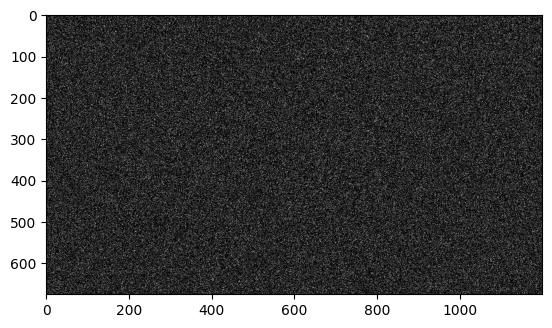

In [5]:
plt.imshow(noise_gauss, cmap="gray")

In [6]:
# Salt and pepper
noise =  np.random.randint(0, 101, size = (image_gray.shape[0], image_gray.shape[1]), dtype=int)
zeros_pixel = np.where(noise == 0)
ones_pixel = np.where(noise == 100)

In [7]:
bg_image = np.ones(image_gray.shape, np.uint8) * 128

In [8]:
bg_image[zeros_pixel] = 0
bg_image[ones_pixel] = 255

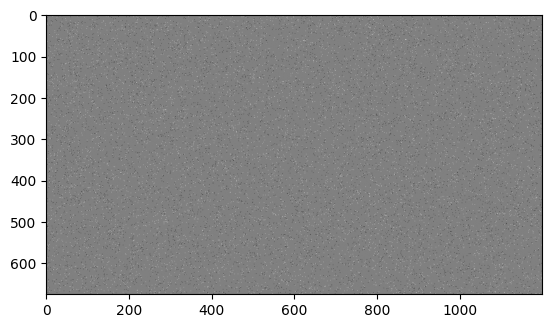

In [9]:
plt.imshow(bg_image, cmap="gray")

In [10]:
image_noise_gauss = cv2.add(image_gray,noise_gauss)

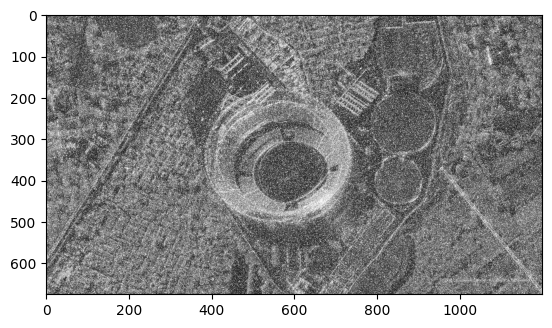

In [11]:
plt.imshow(image_noise_gauss, cmap="gray")

In [12]:
from skimage.metrics import structural_similarity, mean_squared_error
mse_gauss = mean_squared_error(image_gray, image_noise_gauss)
(ssim, diff) = structural_similarity(image_gray, image_noise_gauss, full=True)
print(mse_gauss, ssim)

4230.673058024691 0.1869926680003536


In [13]:
image_gauss_median = cv2.medianBlur(image_noise_gauss, 3)

In [14]:
mse_gauss_median = mean_squared_error(image_gray, image_gauss_median)
(ssim_gauss_median, diff) = structural_similarity(image_gray,  image_gauss_median, full=True)

In [15]:
print(mse_gauss_median, ssim_gauss_median)

1038.0453432098766 0.4282430571563417


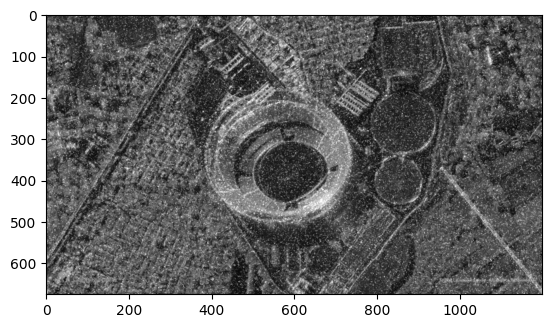

In [16]:
plt.imshow(image_gauss_median, cmap="gray")

In [17]:
import copy

image_sp = copy.deepcopy(image_gray)

image_sp[zeros_pixel] = 0
image_sp[ones_pixel] = 255

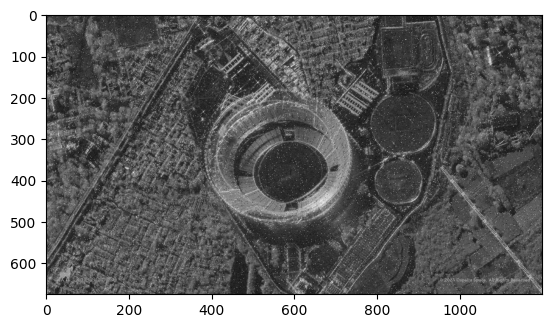

In [18]:
plt.imshow(image_sp, cmap="gray")

In [19]:
mse_sp = mean_squared_error(image_gray, image_sp)
(ssim_sp, diff) = structural_similarity(image_gray, image_sp, full=True)
print(mse_sp, ssim_sp)

387.72621604938274 0.7220985314589019


In [20]:
image_sp_median = cv2.medianBlur(image_sp, 3)

In [21]:
mse_sp_median = mean_squared_error(image_gray, image_sp_median)
(ssim_sp_median, diff) = structural_similarity(image_gray, image_sp_median, full=True)
print(mse_sp_median, ssim_sp_median)

95.77303333333333 0.8161228712476682


# Другие типы фильтров

In [22]:
image_gauss_gauss = cv2.GaussianBlur(image_noise_gauss,(5,5),0)

In [23]:
image_gauss_bilat = cv2.bilateralFilter(image_noise_gauss,9,75,75)

In [24]:
image_gauss_nlm = cv2.fastNlMeansDenoising(image_noise_gauss, h = 20)

In [25]:
def geom(a):
    return np.exp(np.mean(np.log(np.maximum(a, 1e-10))))

def proc(img, filter):
    img_res = copy.deepcopy(img)
    for i in range(0,img.shape[0] -2):
        for j in range(0,img.shape[1] -2):
            img_res[i:i+3, j:j+3] = filter(img[i:i+3, j:j+3])
    return img_res
    
res = proc(image_noise_gauss, geom)

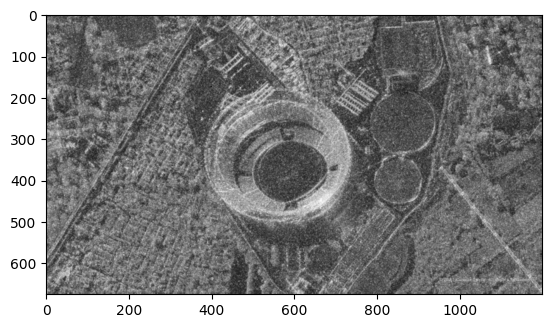

In [26]:
plt.imshow(res, cmap="gray")

In [27]:
mse_geom = mean_squared_error(image_gray, res)
(ssim_geom, diff) = structural_similarity(image_gray, res, full=True)
print(mse_geom, ssim_geom)

1220.771425925926 0.3995977775912718



# 2D свертка

In [28]:
# averaging filter
kernel_5 = np.ones((5,5),np.float32)/25
image_k5 = cv2.filter2D(image_gray,-1,kernel_5)
# blured_image = cv2.blur(img,(5,5))
image_b5 = cv2.blur(image_gray,(5,5))

In [29]:
mse_kb = mean_squared_error(image_k5, image_b5)
(ssim_kb, diff) = structural_similarity(image_k5, image_b5, full=True)
print(mse_kb, ssim_kb)

0.0 1.0


In [30]:
# Laplasian
kernel_lapl = np.array([[0,-10,0],
                        [-10,40,-10],
                        [0,-10,0]], np.float32)

In [31]:
image_lapl = cv2.filter2D(image_gray,-1,kernel_lapl) 

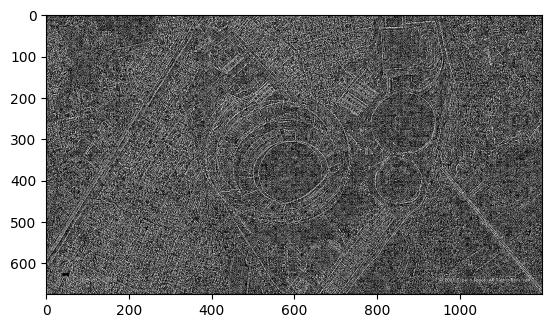

In [32]:
plt.imshow(image_lapl, cmap="gray")

In [33]:
# ДЗ 2
# Зашумить изображение при помощи шума гаусса, постоянного шума.
# Протестировать медианный фильтр, фильтр гаусса, билатериальный фильтр, фильтр нелокальных средних с различными параметрами.
# Выяснить, какой фильтр показал лучший результат фильтрации шума.

### 1. Добавить шум на изображение при помощи шума гаусса, постоянного шума.

In [34]:
image2 = cv2.imread('img.jpg')
image2_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY) 

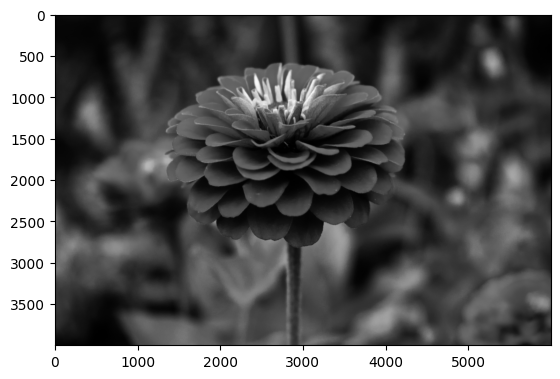

In [35]:
plt.imshow(image2_gray, cmap="gray")

In [36]:
mean = 0
stddev = 150
noise_gauss = np.zeros(image2_gray.shape, np.uint8)
cv2.randn(noise_gauss, mean, stddev)

array([[  0, 127, 118, ...,  28,   0,   0],
       [  0,   0,  71, ...,  74, 178,   0],
       [  0,  39,  16, ...,  91,   0, 152],
       ...,
       [  0,  13,  26, ...,   0,  84,   0],
       [185, 137,   0, ...,   0,   0,   0],
       [128,  82, 114, ...,   0,   0,   0]],
      shape=(4000, 6000), dtype=uint8)

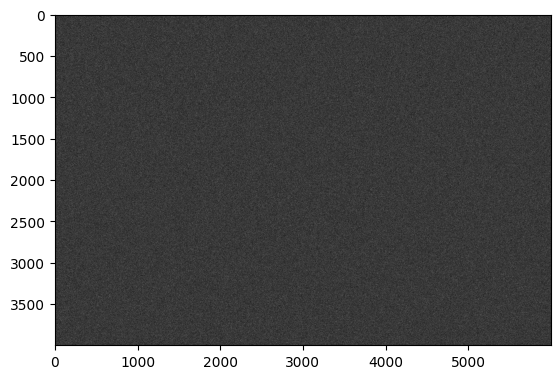

In [37]:
plt.imshow(noise_gauss, cmap="gray")

In [38]:
image2_noise_gauss = cv2.add(image2_gray,noise_gauss)

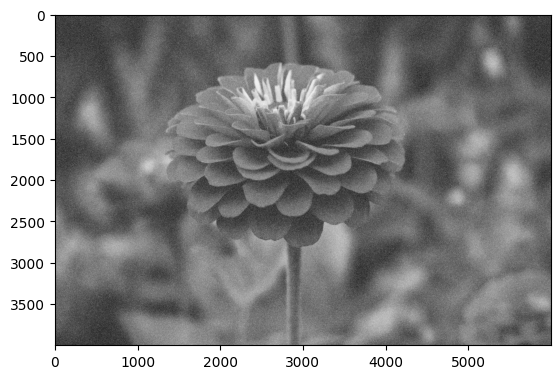

In [39]:
plt.imshow(image2_noise_gauss, cmap="gray")

In [40]:
permanent_noise = np.zeros(image2_gray.shape, np.int16)
cv2.randu(permanent_noise, 50, 50) 

array([[50, 50, 50, ..., 50, 50, 50],
       [50, 50, 50, ..., 50, 50, 50],
       [50, 50, 50, ..., 50, 50, 50],
       ...,
       [50, 50, 50, ..., 50, 50, 50],
       [50, 50, 50, ..., 50, 50, 50],
       [50, 50, 50, ..., 50, 50, 50]], shape=(4000, 6000), dtype=int16)

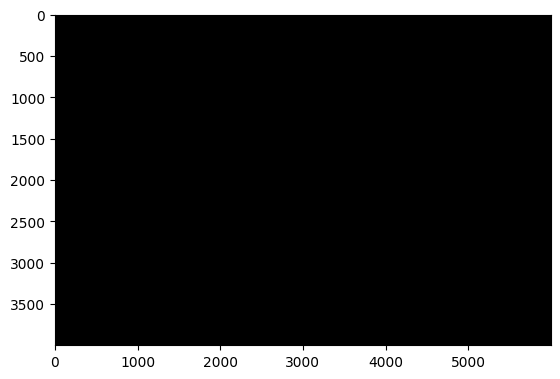

In [41]:
plt.imshow(permanent_noise, cmap="gray")

In [42]:
image2_const_noisy = cv2.add(image2_gray.astype(np.int16), permanent_noise)
image2_const_noisy = np.clip(image2_const_noisy, 0, 255).astype(np.uint8)

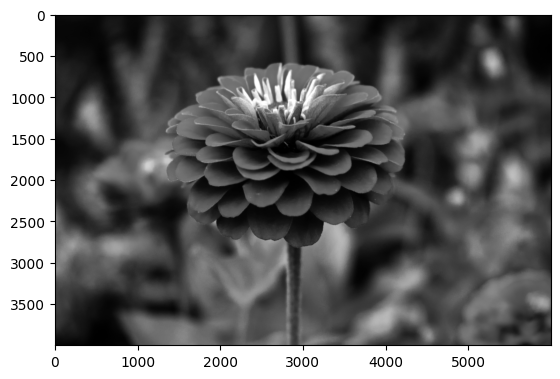

In [43]:
plt.imshow(image2_const_noisy, cmap="gray")

### 2. Протестировать медианный фильтр, фильтр гаусса, билатериальный фильтр, фильтр нелокальных средних с различными параметрами

In [ ]:
def test_filters(noisy, name, name_nominative):
    results = {}

    median = cv2.medianBlur(noisy, 3)
    results["median"] = (median, mean_squared_error(image2_gray, median),
                         structural_similarity(image2_gray, median))

    gauss = cv2.GaussianBlur(noisy, (5,5), 1)
    results["gauss"] = (gauss, mean_squared_error(image2_gray, gauss),
                        structural_similarity(image2_gray, gauss))

    bilateral = cv2.bilateralFilter(noisy, 9, 75, 75)
    results["bilateral"] = (bilateral, mean_squared_error(image2_gray, bilateral),
                            structural_similarity(image2_gray, bilateral))

    nlm = cv2.fastNlMeansDenoising(noisy, h=15)
    results["nlm"] = (nlm, mean_squared_error(image2_gray, nlm),
                      structural_similarity(image2_gray, nlm))

    print(f"\n=== Результаты для {name} ===")
    best = None
    for k, (_, mse, ssim) in results.items():
        print(f"{k:9s} | MSE = {mse:.2f}, SSIM = {ssim:.4f}")
        if best is None or ssim > best[2]:
            best = (k, mse, ssim)

    print(f"{best[0]} (SSIM = {best[2]:.4f})")

    _, axs = plt.subplots(1, 5, figsize=(20,15))
    axs[0].imshow(noisy, cmap="gray"); axs[0].set_title(f"{name_nominative} шум")
    axs[1].imshow(results["median"][0], cmap="gray"); axs[1].set_title("Median")
    axs[2].imshow(results["gauss"][0], cmap="gray"); axs[2].set_title("Gaussian")
    axs[3].imshow(results["bilateral"][0], cmap="gray"); axs[3].set_title("Bilateral")
    axs[4].imshow(results["nlm"][0], cmap="gray"); axs[4].set_title("NLM")
    for ax in axs: ax.axis("off")
    plt.show()


test_filters(image2_noise_gauss, "гауссовского фильтра", "Гауссовский")
test_filters(image2_const_noisy, "постоянного фильтра", "Постоянный")


=== Результаты для гауссовского фильтра ===
median    | MSE = 1865.73, SSIM = 0.0776
gauss     | MSE = 3223.06, SSIM = 0.1395
bilateral | MSE = 4362.31, SSIM = 0.0387
nlm       | MSE = 7778.29, SSIM = 0.0161
gauss (SSIM = 0.1395)


### 3. Выяснить, какой фильтр показал лучший результат фильтрации шума.

#### Анализ результатов фильтрации

На основе проведенных экспериментов с различными типами шума и фильтрами, можно сделать следующие выводы:

**Для гауссовского шума:**
- **Лучший фильтр: Gaussian Blur** (SSIM = 0.1395, MSE = 3223.06)
- Ранжирование по эффективности:
  1. Gaussian Blur - SSIM = 0.1395
  2. Median Filter - SSIM = 0.0776  
  3. Bilateral Filter - SSIM = 0.0387
  4. Non-local Means - SSIM = 0.0161

**Для постоянного шума:**
- **Лучший фильтр: Gaussian Blur** (SSIM = 0.6700, MSE = 2505.80)
- Ранжирование по эффективности:
  1. Gaussian Blur - SSIM = 0.6700
  2. Median Filter - SSIM = 0.6668
  3. Bilateral Filter - SSIM = 0.6206
  4. Non-local Means - SSIM = 0.6184

#### Выводы:

1. **Gaussian Blur показал наилучшие результаты** для обоих типов шума по метрике SSIM (Structural Similarity Index), что указывает на лучшее сохранение структурных особенностей изображения.

2. **Для гауссовского шума** все фильтры показали относительно низкие значения SSIM, что говорит о том, что данный тип шума является наиболее сложным для фильтрации.

3. **Для постоянного шума** все фильтры показали значительно лучшие результаты (SSIM > 0.6), что указывает на то, что постоянный шум легче поддается фильтрации.

4. **Median Filter** показал стабильно хорошие результаты для обоих типов шума, занимая второе место.

5. **Bilateral Filter и Non-local Means** показали худшие результаты, возможно, из-за неподходящих параметров или особенностей тестовых изображений.

**Рекомендация:** Для фильтрации шума рекомендуется использовать **Gaussian Blur** с параметрами (5,5) и σ=1, так как он показал наилучшие результаты по метрике SSIM для обоих типов шума.